# Object detection model

> Object Detection Model


- skip_showdoc: true
- skip_exec: true

## KITTI

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Create a histogram plot
output_notebook()

Loading BokehJS ...

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import Kitti, VisionDataset
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
import cv2

In [ ]:
class Kitti_v2(Kitti):
    def __init__(self, *args, **kwargs):
        super(Kitti_v2, self).__init__(*args, **kwargs)

In [ ]:
path = './Data'
batch_size = 16

# Define transforms
# Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize((375, 1242)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

In [ ]:
# Load KITTI train dataset
train_dataset = Kitti_v2(root=path, train='true', download=True, transform=transform)

# Load KITTI test dataset
test_dataset = Kitti_v2(root=path, train='false', download=True, transform=transform)

In [ ]:
# Create DataLoader for train dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)), num_workers = 8)

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda batch: tuple(zip(*batch)), num_workers = 8)

In [ ]:
train_dataset

Dataset Kitti_v2
    Number of datapoints: 7481
    Root location: ./Data
    StandardTransform
Transform: Compose(
               Resize(size=(375, 1242), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
len(train_dataset)

7481

In [ ]:
image, targets = train_dataset[2]
type(targets)

list

In [ ]:
image.shape

torch.Size([3, 375, 1242])

In [ ]:
car_types = ['Car', 'Van', 'DontCare', 'Cyclist', 'Pedestrian', 'Truck', 'Tram', 'Misc', 'Person_sitting']

In [ ]:
car_types = []
for image, targets in tqdm(train_dataset):
    for target in targets:
        if target['type'] not in car_types:
            car_types.append(target['type'])    

print(f'{car_types}')

100%|███████████████████████████████████████████████████████████████████████████████| 7481/7481 [01:47<00:00, 69.82it/s]

['Car', 'Van', 'DontCare', 'Cyclist', 'Pedestrian', 'Truck', 'Tram', 'Misc', 'Person_sitting']


In [ ]:
max_len = 0
target_items = []

for image, targets in tqdm(train_dataset):
    target_items.append(len(targets))
    if len(targets) > max_len:
        max_len = len(targets)

print(f'{max_len}')


100%|███████████████████████████████████████████████████████████████████████████████| 7481/7481 [01:27<00:00, 85.34it/s]

24


In [ ]:
p = figure(title="Histogram of target_items", x_axis_label="Value", y_axis_label="Frequency")
hist, edges = np.histogram(target_items, bins=20)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(p)

In [ ]:
import matplotlib.pyplot as plt

def cv2_show(image_np, label):
    image_cv2 = cv2.cvtColor((image_np * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)

    for i_object in label:
        # Draw the bounding box
        bbox = i_object['bbox']
        cv2.rectangle(image_cv2, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)
    
        # Display the label
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image_cv2, i_object['type'], (int(bbox[0]), int(bbox[1]) - 10), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    # Convert the image back to RGB format for display with Matplotlib
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    return image_rgb

    
def show_image(kitti_dataset):
    # Access an image and its label from the dataset
    image, label = kitti_dataset
    
    # Convert the image tensor to a NumPy array
    image_np = image.numpy().transpose((1, 2, 0))
    image_rgb = cv2_show(image_np, label)
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Define a function to display images
def show_images(images, labels, **kwargs):
    nrows = int(math.sqrt(len(images)))
    ncols = int(np.floor(len(images)/nrows))
        
    fig, axes = plt.subplots(nrows, ncols, **kwargs)
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.01, hspace=0.01)

    # Display the image using Matplotlib
    for ax, image, label in zip(axes.flat, images, labels):
        # Convert image to numpy array and adjust pixel values
        image_np = image.numpy().transpose((1, 2, 0))
        image_rgb = cv2_show(image_np, label)
        
        # Display image
        ax.imshow(image_rgb)
        ax.axis('off')

    for ax in axes.flat[len(images):]:
        ax.axis('off')
    plt.show()

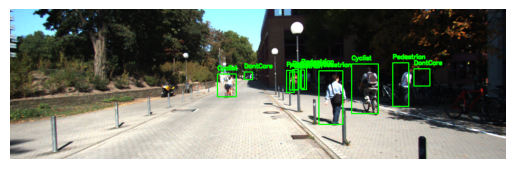

In [ ]:
show_image(train_dataset[18])

## Iter

In [ ]:
# Get a batch of images and labels from the data loader
examples = iter(train_loader)
images, labels = next(examples)


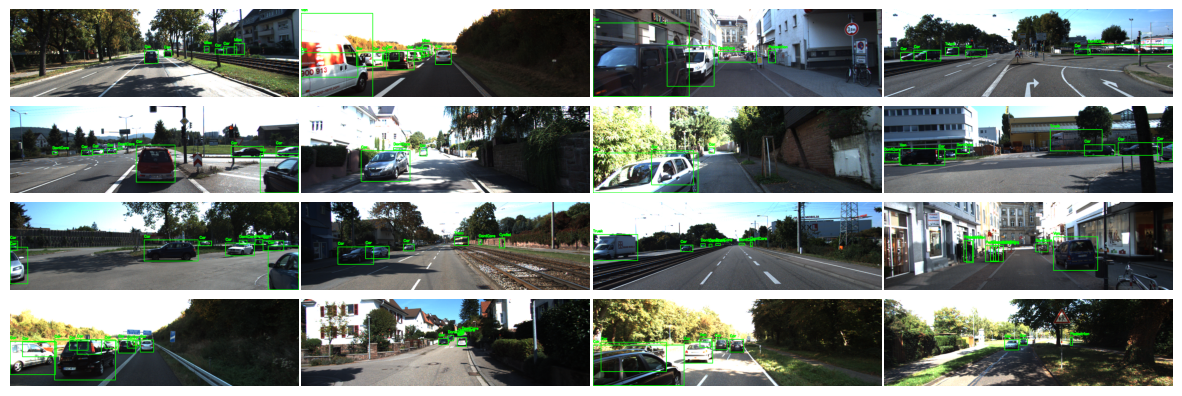

In [ ]:
show_images(images, labels, figsize=(15, 5))

## New Method

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import Kitti, VisionDataset
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
import cv2

In [ ]:
class Kitti_v2(Kitti):
    def __init__(self, *args, **kwargs):
        super(Kitti_v2, self).__init__(*args, **kwargs)

In [ ]:
import pathlib

import torch
import torch.utils.data

from torchvision import models, datasets, tv_tensors
from torchvision.transforms import v2

torch.manual_seed(0)

<torch._C.Generator>

In [ ]:
path = './Data'
batch_size = 16

transform2 = v2.Compose(
    [
        v2.ToImage(),
        # v2.RandomPhotometricDistort(p=1),
        # v2.RandomZoomOut(fill={tv_tensors.Image: (123, 117, 104), "others": 0}),
        # # v2.RandomIoUCrop(),
        # v2.RandomHorizontalFlip(p=1),
        # v2.SanitizeBoundingBoxes(),
        # v2.ToDtype(torch.float32, scale=True),
    ]
)
# Load KITTI train dataset
train_dataset = Kitti_v2(root=path, train='true', download=True, transform=transform2)

# Load KITTI test dataset
test_dataset = Kitti_v2(root=path, train='false', download=True, transform=transform2)


In [ ]:
train_dataset2 = datasets.wrap_dataset_for_transforms_v2(train_dataset, target_keys=("boxes", "labels"))

test_dataset2 = datasets.wrap_dataset_for_transforms_v2(test_dataset, target_keys=("boxes", "labels"))


sample = train_dataset2[0]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }")

type(img) = <class 'torchvision.tv_tensors._image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['boxes', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>


In [ ]:
from PIL import Image

In [ ]:
def cv2_show(pil_image, label):
    # Convert PIL image to NumPy array
    image_np = np.array(pil_image)
    image_cv2 = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    for bbox, item in zip(label['boxes'], label['labels']):
        # Draw the bounding box
        cv2.rectangle(image_cv2, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)
    
        # Display the label
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image_cv2, str(item), (int(bbox[0]), int(bbox[1]) - 10), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    # Convert the image back to RGB format for display with Matplotlib
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    
    # Convert the image to a PIL image
    pil_image = Image.fromarray(image_rgb)
    
    return pil_image

def show_image(dataset):
    # Access an image and its label from the dataset
    image, label = dataset
    
    # Convert the image tensor to a NumPy array
    # image_np = image.numpy().transpose((1, 2, 0))
    image_rgb = cv2_show(image, label)
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [ ]:
show_image(train_dataset2[18])# Create DataLoader for train dataset

TypeError: Cannot handle this data type: (1, 1, 3), <f4

In [ ]:
batch_size = 2

train_loader = DataLoader(train_dataset2, batch_size=batch_size, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)), num_workers = 8)

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset2, batch_size=batch_size, shuffle=False, collate_fn=lambda batch: tuple(zip(*batch)), num_workers = 8)

## Model

In [ ]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

In [ ]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)


In [ ]:
for imgs, targets in train_loader:
    loss_dict = model(imgs, targets)
    # Put your training logic here

AttributeError: 'PngImageFile' object has no attribute 'shape'

In [ ]:
    print(f"{[img.shape for img in imgs] = }")
    print(f"{[type(target) for target in targets] = }")
    for name, loss_val in loss_dict.items():
        print(f"{name:<20}{loss_val:.3f}")

NameError: name 'data_loader' is not defined

## COCO

In [ ]:
import os

In [ ]:
os.cpu_count()

12

In [ ]:
import pathlib

import torch
import torch.utils.data

from torchvision import models, datasets, tv_tensors
from torchvision.transforms import v2

torch.manual_seed(0)

# This loads fake data for illustration purposes of this example. In practice, you'll have
# to replace this with the proper data.
# If you're trying to run that on collab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
ROOT = pathlib.Path("Data") / "coco"
IMAGES_PATH = str(ROOT / "images")
ANNOTATIONS_PATH = str(ROOT / "instances.json")

In [ ]:
from helpers import plot

ModuleNotFoundError: No module named 'helpers'